In [46]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

import matplotlib as mpl
import seaborn as sns

from sklearn import preprocessing
from sklearn import datasets


KNN does not predict with categorical variables.
As part of preprocessing, features have been transformed as follows
1) Question1 q1a responses have been tranformed into dummy binary for each answer
2) Ear lelated answers (0=no ear response, 1=one ear response 2=Two ear response
3) Gender has been mapped as 1=Male and 0=Female
4) The rest of the binary responses Yes=1 and No=0

In [90]:
ds= pd.read_csv("C:/MSCS/2019/dm/project/data.csv")  

In [87]:
ds.describe()

,patientid,Vertigo_q1a,Faint_headedness_q1a,Wooziness_q1a,Imbalance_q1a,Swimming_sensation_q1a,None_of_these_q1a,symptoms_q2,symptoms_q5,symptoms_q6,...,yesno2_q13,yesno2_q14,yesno2_q15,yesno2_q17,ear_q5,ear_q7,ear_q8,yesno3_q12,Age,Gender_Male
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,22073.093985,0.466165,0.022556,0.150376,0.315789,0.022556,0.0,1.932331,0.620301,0.255639,...,0.473684,0.601504,0.560150,0.327068,0.695489,0.345865,0.124060,0.120301,60.507519,0.274436
std,26812.670824,0.499794,0.148764,0.358113,0.465706,0.148764,0.0,0.251651,0.486227,0.437042,...,0.500248,0.490511,0.497304,0.470027,0.633453,0.521899,0.362934,0.325926,14.820496,0.447071
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,76.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
50%,1065.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,60.000000,0.000000
75%,51033.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,70.000000,1.000000
max,61053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,95.000000,1.000000


Age is a very important factor while analysing medical research. Exploring this data indicates that most of the participants weere approximately between the age of 50 and 70. It would of great interest therefore to know how best this age range is a better or worse predictor.
If this age range turns out to be a bad predictor, we might as well conclude that age does not matter or we might need to examine age against some other features by predicting with age and predicting without age feature.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


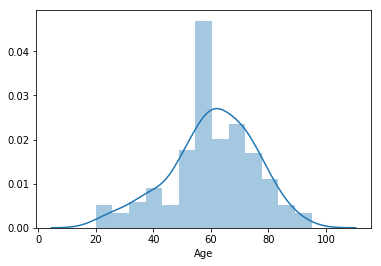

In [31]:
sns.distplot(ds.Age);

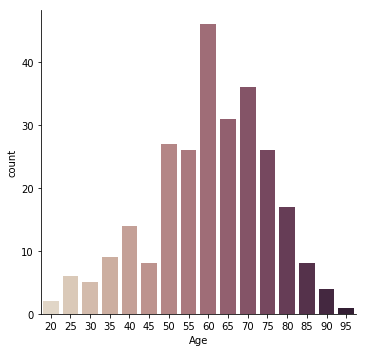

In [40]:
sns.catplot(x="Age", kind="count", palette="ch:.25", data=ds);

In [113]:
cfeatures=['Vertigo_q1a','Faint_headedness_q1a','Wooziness_q1a','Imbalance_q1a','Swimming_sensation_q1a',
'None_of_these_q1a','symptoms_q2','symptoms_q5','symptoms_q6','symptoms_q7','duration_q1','duration_q3a',
'duration_q3d','duration_q3e','duration_q3g','yesno1_q4','yesno1_q7','yesno1_q8','yesno1_q12','yesno1_q13',
'yesno1_q15','yesno1_q17','yesno1_q18','yesno1_q19','yesno2_q4','yesno2_q11','yesno2_q13','yesno2_q14',
'yesno2_q15','yesno2_q17','ear_q5','ear_q7','ear_q8','yesno3_q12','Gender_Male','Age'
]
X=ds[cfeatures]
y=ds['BPPV']
y.head()


0    Yes
1     No
2    Yes
3    Yes
4     No
Name: BPPV, dtype: object

In [114]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [115]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
y_pred = classifier.predict(X_test)

In [117]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[14 10]
 [14 16]]
              precision    recall  f1-score   support

          No       0.50      0.58      0.54        24
         Yes       0.62      0.53      0.57        30

   micro avg       0.56      0.56      0.56        54
   macro avg       0.56      0.56      0.55        54
weighted avg       0.56      0.56      0.56        54



Results with No Age.
Age pushes accuracy down.


[[24  9]
 [ 2 19]]
              precision    recall  f1-score   support

          No       0.92      0.73      0.81        33
         Yes       0.68      0.90      0.78        21

   micro avg       0.80      0.80      0.80        54
   macro avg       0.80      0.82      0.79        54
weighted avg       0.83      0.80      0.80        54




C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


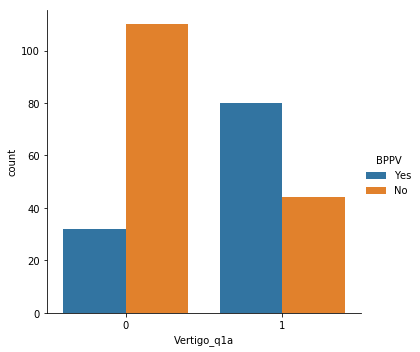

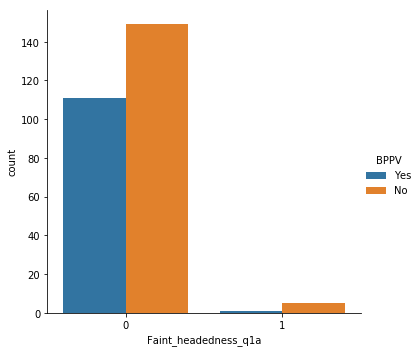

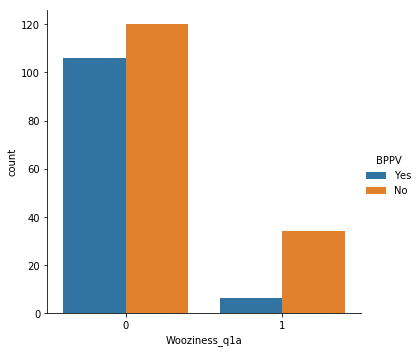

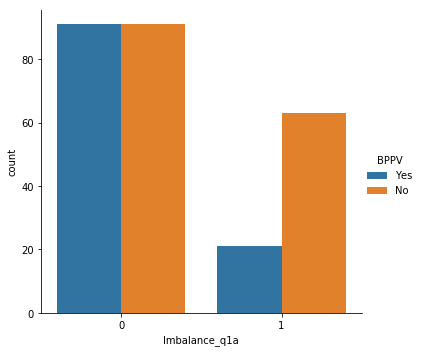

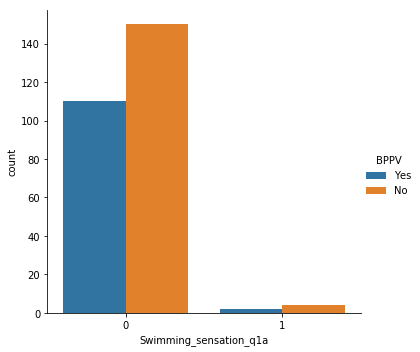

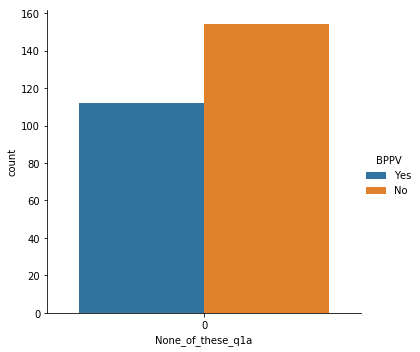

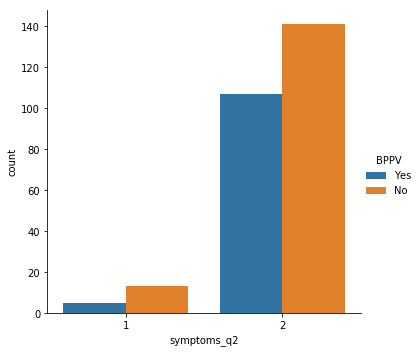

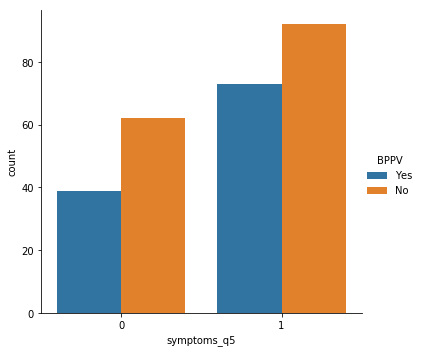

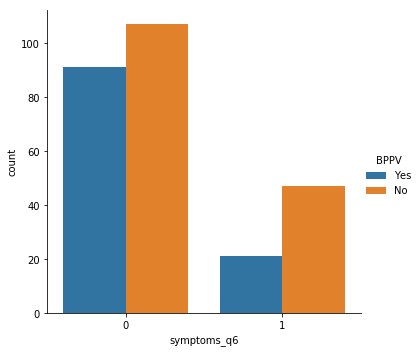

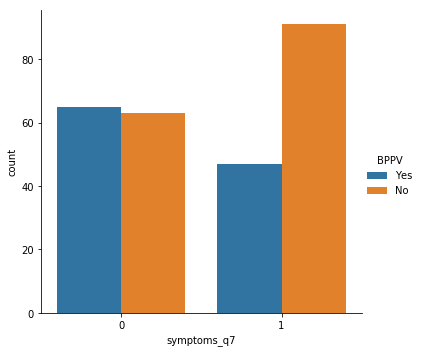

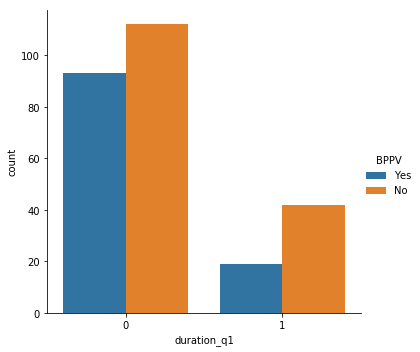

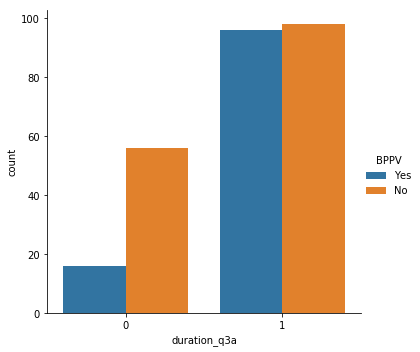

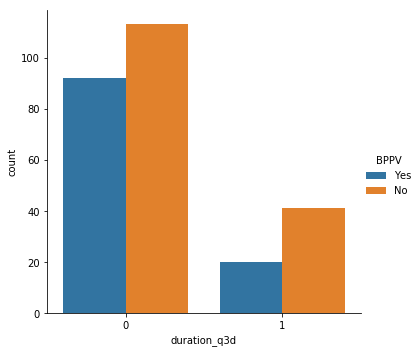

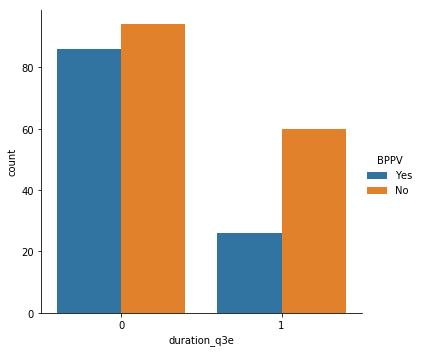

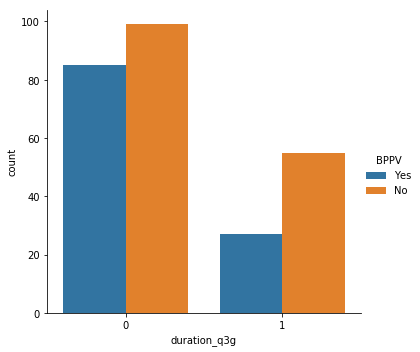

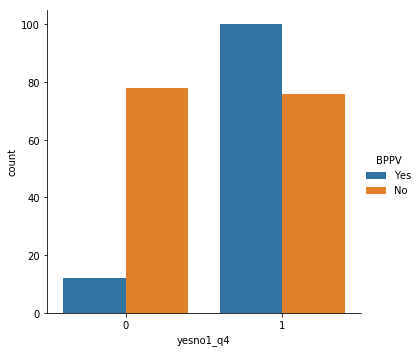

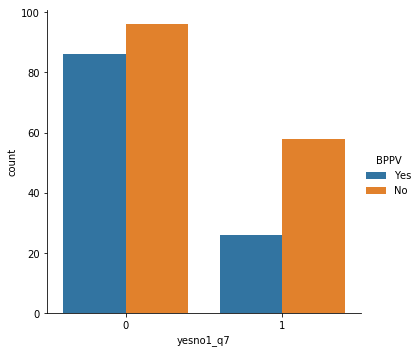

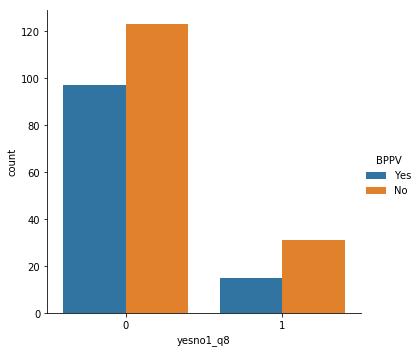

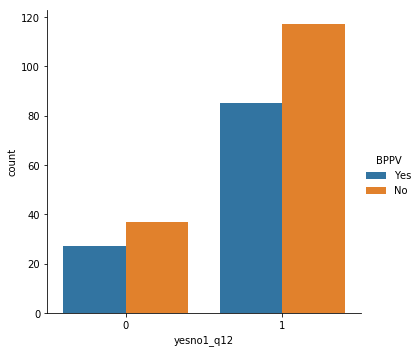

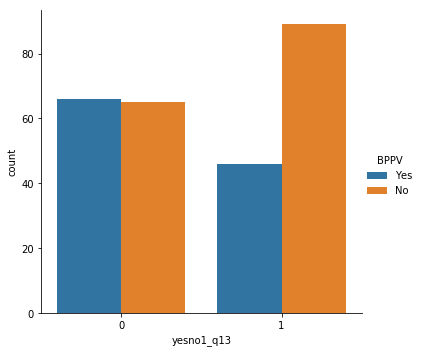

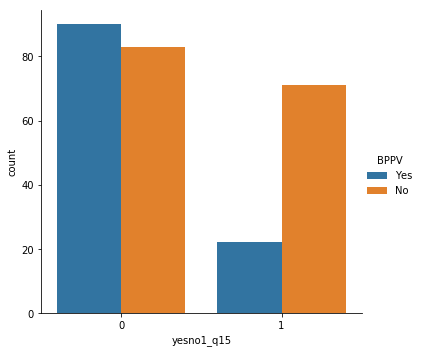

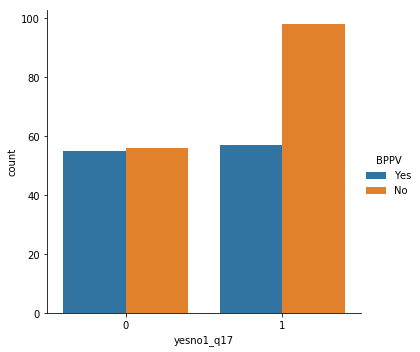

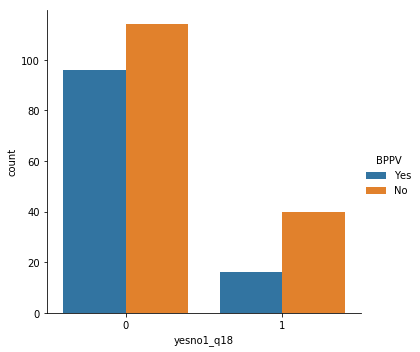

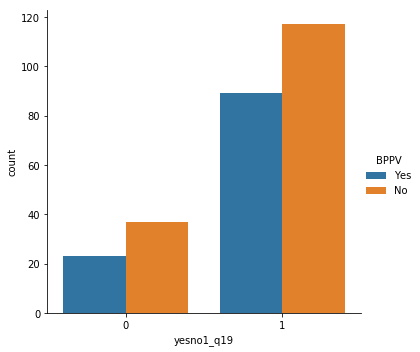

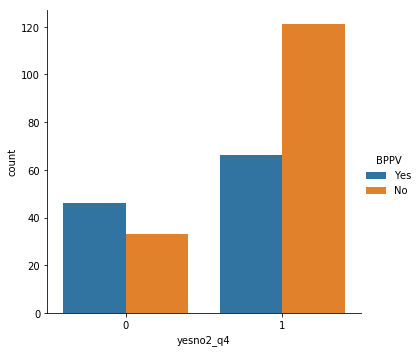

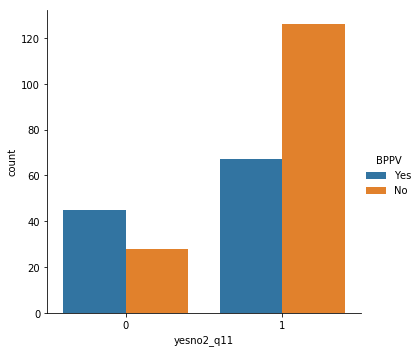

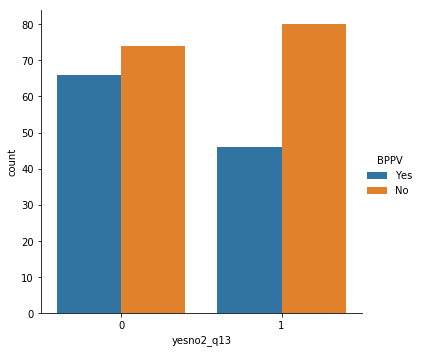

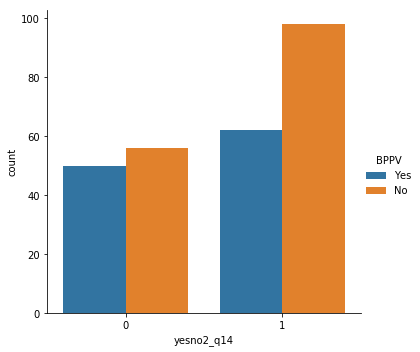

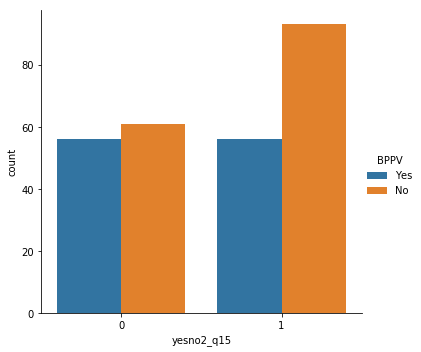

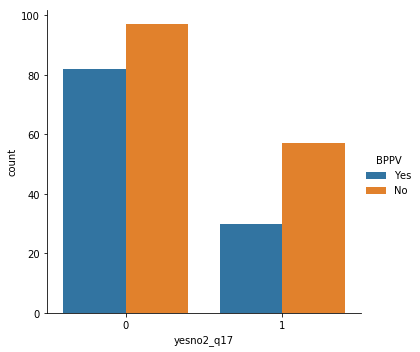

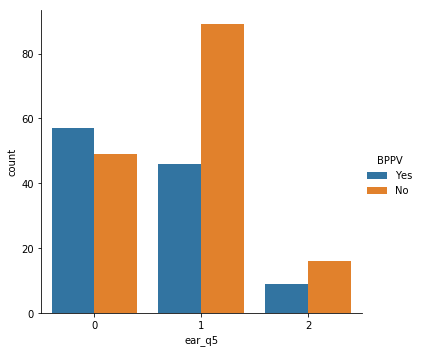

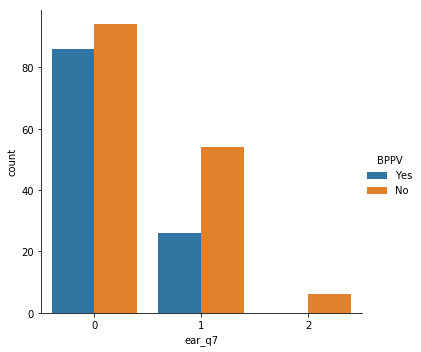

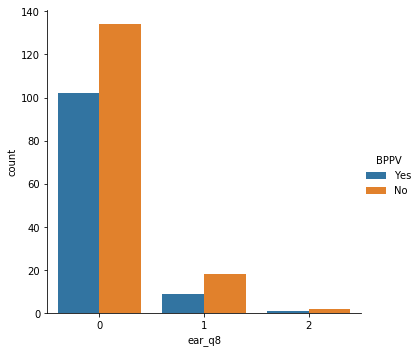

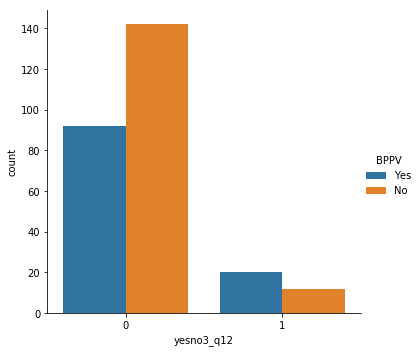

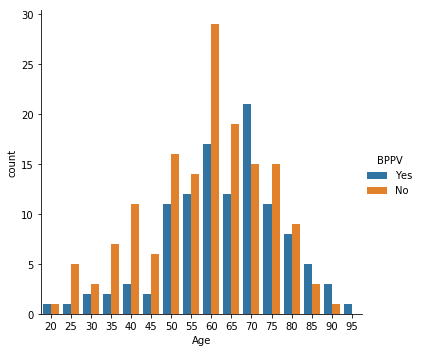

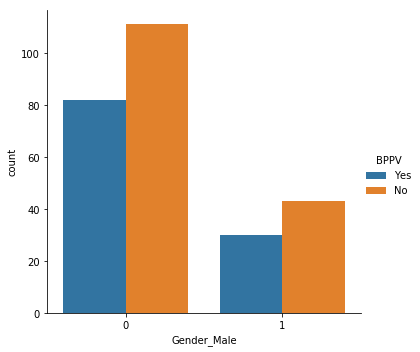

In [112]:
sns.catplot(x="Vertigo_q1a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="Faint_headedness_q1a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="Wooziness_q1a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="Imbalance_q1a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="Swimming_sensation_q1a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="None_of_these_q1a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="symptoms_q2",hue="BPPV", kind="count", data=ds);
sns.catplot(x="symptoms_q5",hue="BPPV", kind="count", data=ds);
sns.catplot(x="symptoms_q6",hue="BPPV", kind="count", data=ds);
sns.catplot(x="symptoms_q7",hue="BPPV", kind="count", data=ds);
sns.catplot(x="duration_q1",hue="BPPV", kind="count", data=ds);
sns.catplot(x="duration_q3a",hue="BPPV", kind="count", data=ds);
sns.catplot(x="duration_q3d",hue="BPPV", kind="count", data=ds);
sns.catplot(x="duration_q3e",hue="BPPV", kind="count", data=ds);
sns.catplot(x="duration_q3g",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q4",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q7",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q8",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q12",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q13",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q15",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q17",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q18",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno1_q19",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno2_q4",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno2_q11",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno2_q13",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno2_q14",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno2_q15",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno2_q17",hue="BPPV", kind="count", data=ds);
sns.catplot(x="ear_q5",hue="BPPV", kind="count", data=ds);
sns.catplot(x="ear_q7",hue="BPPV", kind="count", data=ds);
sns.catplot(x="ear_q8",hue="BPPV", kind="count", data=ds);
sns.catplot(x="yesno3_q12",hue="BPPV", kind="count", data=ds);
sns.catplot(x="Age",hue="BPPV", kind="count", data=ds);
sns.catplot(x="Gender_Male",hue="BPPV", kind="count", data=ds);